导入需要的库，包括 Pandas 用于读取 CSV 文件，Matplotlib 和 Seaborn 用于绘制图形。

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

使用 Pandas 读取 CSV 文件，并将数据存储在 DataFrame 中。

In [16]:
df = pd.read_csv('Data_V1.2.csv')

# Insert a new column for the hard reported ratio
df['hard_reported_ratio'] = df['Number in hard mode'] / df['Number of  reported results']

调用 DataFrame 的 corr 方法，计算数据之间的相关性系数矩阵。

In [17]:
corr_matrix = df.corr()

/tmp/ipykernel_9652/3147368345.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


使用 Seaborn 的 heatmap 函数绘制相关度图。你可以设置图形的颜色、标签和标题。

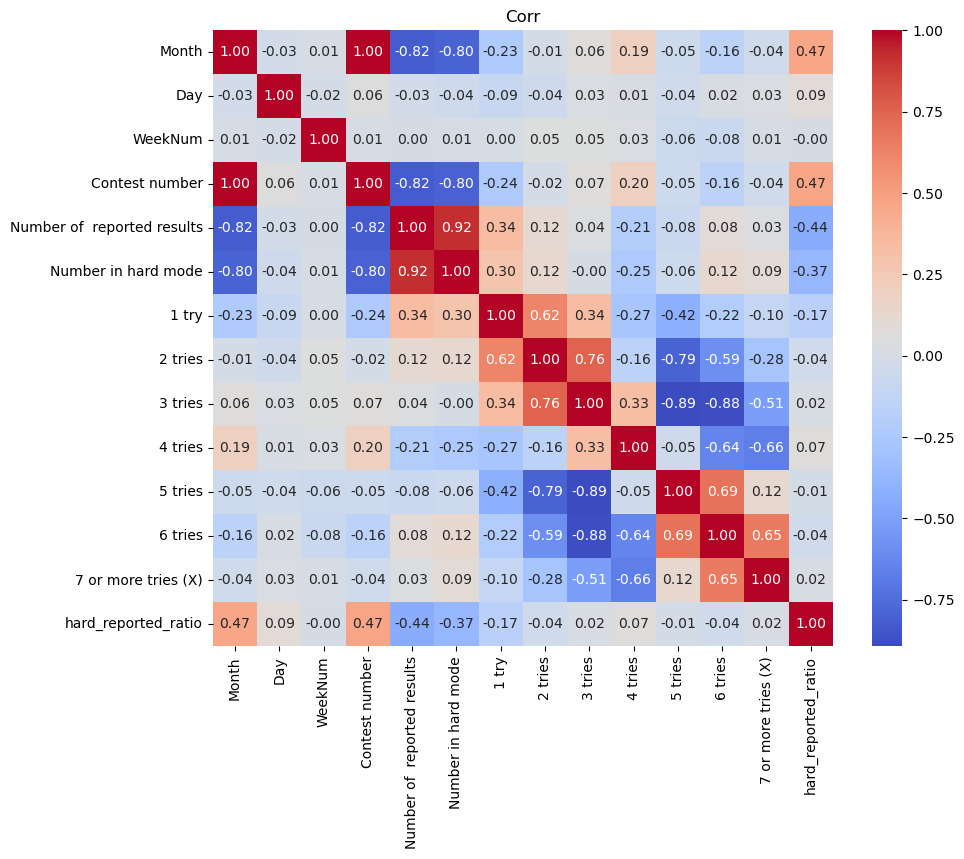

In [18]:
plt.figure(figsize=(10, 8)) # 设置图形大小
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f') # 绘制相关度图，设置颜色和标签
plt.title('Corr') # 添加标题
plt.show() # 显示图形

只想显示最后一行的热力图，并去掉自身的相关系数，可以在绘制热力图时指定只显示最后一行，并将最后一行的值替换为 NaN。

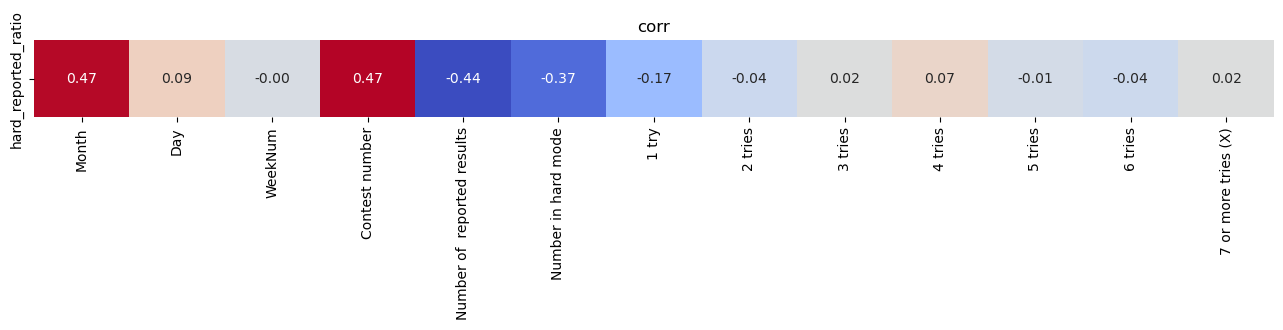

In [19]:
# 选取最后一行
corr_matrix_last = corr_matrix.tail(1)
# 去掉最后一格，仅保留之前
corr_matrix_last = corr_matrix.iloc[:, :-1]

plt.figure(figsize=(16, 1))
sns.heatmap(corr_matrix_last.tail(1), cmap='coolwarm', annot=True,
            fmt='.2f', cbar=False)
plt.title('corr')
plt.savefig('corr.png', dpi=1000, bbox_inches='tight')
plt.show()

In [20]:
# ggplot
# import pyensae
# from pyensae.graphhelper import Corrplot
# plt.figure(figsize=(16, 1))
# c=Corrplot(corr_matrix_last)
# c.plot(mar=c(0, 0, 0, 0))